# Analyzed Videos EDA

In [96]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [97]:
import os
import glob
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import seaborn as sns

In [98]:
path_to_root = '/home/ben/projects/SaoPauloBrazilChapter_BrazilianSignLanguage/'

In [99]:
metadata = pd.read_csv(path_to_root + 'data/raw/combined/target_dataset_video_metadata.csv')

In [100]:
def get_frame(frame_index, video_path):
    cap = cv2.VideoCapture(video_path)
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_index)  # Set frame index
    ret, frame = cap.read()
    cap.release()
    if not ret:
        print(f"Could not read frame {frame_index} from video")
        frame = None
    return frame

In [101]:
i = 1
metadata_row = metadata.iloc[i].copy()
metadata_row

filename        ajudar_sb_2.mp4
label                    ajudar
data_source                  sb
frame_count                  79
fps                    29.97003
duration_sec           2.635967
width                      1280
height                      720
Name: 1, dtype: object

## Full Dataset Analysis Info

In [102]:
def nested_dict_to_df(nested_dict, prefix=''):
    flat_dict = {}
    
    def flatten(d, parent_key=''):
        for key, value in d.items():
            new_key = f"{parent_key}_{key}" if parent_key else key
            
            if isinstance(value, dict):
                flatten(value, new_key)
            else:
                flat_dict[new_key] = value
    
    flatten(nested_dict)
    return pd.DataFrame([flat_dict])

In [103]:
analysis_info_list = []
for i, row in metadata.iterrows():
    fn = row["filename"]
    analysis_info_path = os.path.join(
        path_to_root, 
        "data", 
        "interim", 
        "Analysis", 
        "28032025", 
        "individual_json", 
        fn.split(".")[0] + "_analysis_info.json"
    )
    if os.path.exists(analysis_info_path):
        with open(analysis_info_path, "r") as f:
            analysis_info = json.load(f)
    analysis_info_df = nested_dict_to_df(analysis_info)
    analysis_info_list.append(analysis_info_df)

In [104]:
analysis_info_list[0]

,metadata_filename,metadata_fps,metadata_width,metadata_height,metadata_duration_sec,metadata_frame_count,metadata_data_source,metadata_label,metadata_motion_detection_version,metadata_pose_detection_version,...,pose_analysis_landmark_measurements_face_height_max,pose_analysis_landmark_measurements_top_head_to_shoulders_mean,pose_analysis_landmark_measurements_top_head_to_shoulders_median,pose_analysis_landmark_measurements_top_head_to_shoulders_max,pose_analysis_landmark_measurements_nose_to_shoulders_mean,pose_analysis_landmark_measurements_nose_to_shoulders_median,pose_analysis_landmark_measurements_nose_to_shoulders_max,pose_analysis_landmark_measurements_chin_to_shoulders_mean,pose_analysis_landmark_measurements_chin_to_shoulders_median,pose_analysis_landmark_measurements_chin_to_shoulders_max
0,ajudar_ne_1.mp4,12,240,176,3.0,44,ne,ajudar,versionA,versionA,...,0.252707,0.38964,0.401485,0.424468,0.281364,0.295888,0.323883,0.143076,0.15486,0.180421


In [105]:
analysis_info = pd.concat(analysis_info_list, axis = 0)

In [115]:
analysis_info['metadata_duration_sec'] = metadata['duration_sec'].values

#### Start Frame / End Frame

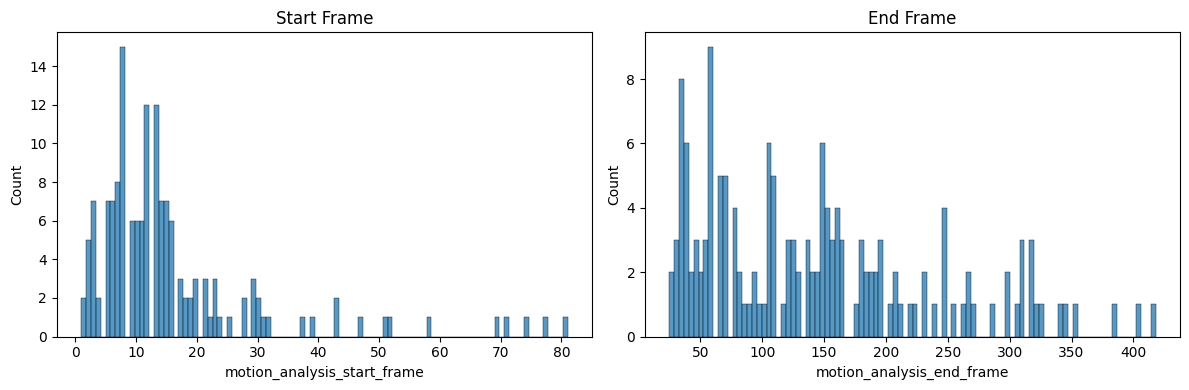

In [107]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(analysis_info.motion_analysis_start_frame, bins=100, ax=ax1)
ax1.set_title('Start Frame')
sns.histplot(analysis_info.motion_analysis_end_frame, bins=100, ax=ax2) 
ax2.set_title('End Frame')
plt.tight_layout()

<Axes: xlabel='motion_analysis_start_frame', ylabel='motion_analysis_end_frame'>

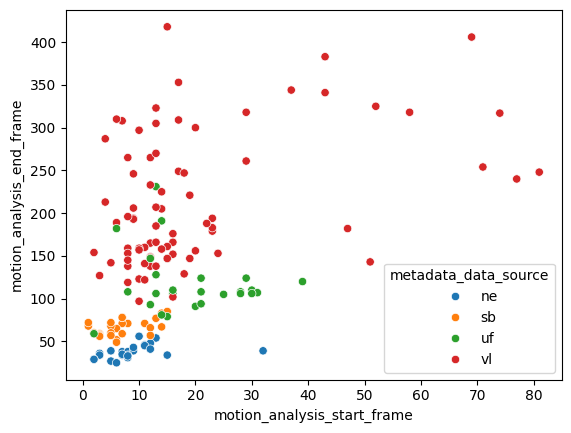

In [122]:
sns.scatterplot(x = 'motion_analysis_start_frame', y = 'motion_analysis_end_frame', data = analysis_info, hue = 'metadata_data_source')

#### Horizontal Offset

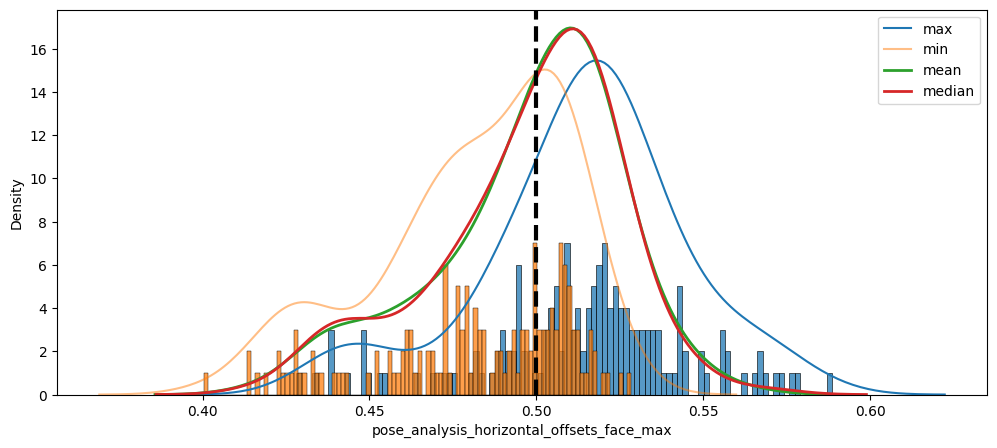

In [ ]:
plt.figure(figsize=(12, 5))
sns.kdeplot(analysis_info.pose_analysis_horizontal_offsets_face_max)
sns.histplot(analysis_info.pose_analysis_horizontal_offsets_face_max, bins=100)

sns.kdeplot(analysis_info.pose_analysis_horizontal_offsets_face_min, alpha = 0.5)
sns.histplot(analysis_info.pose_analysis_horizontal_offsets_face_min, bins=100)

sns.kdeplot(analysis_info.pose_analysis_horizontal_offsets_face_mean, linewidth = 2)
# sns.histplot(analysis_info.pose_analysis_horizontal_offsets_face_mean, bins=100)


sns.kdeplot(analysis_info.pose_analysis_horizontal_offsets_face_median, linewidth = 2)
# sns.histplot(analysis_info.pose_analysis_horizontal_offsets_face_median, bins=100)
#
plt.legend(['max', 'min', 'mean', 'median'])
plt.axvline(0.5, color = 'k', linewidth = 3, linestyle = '--')

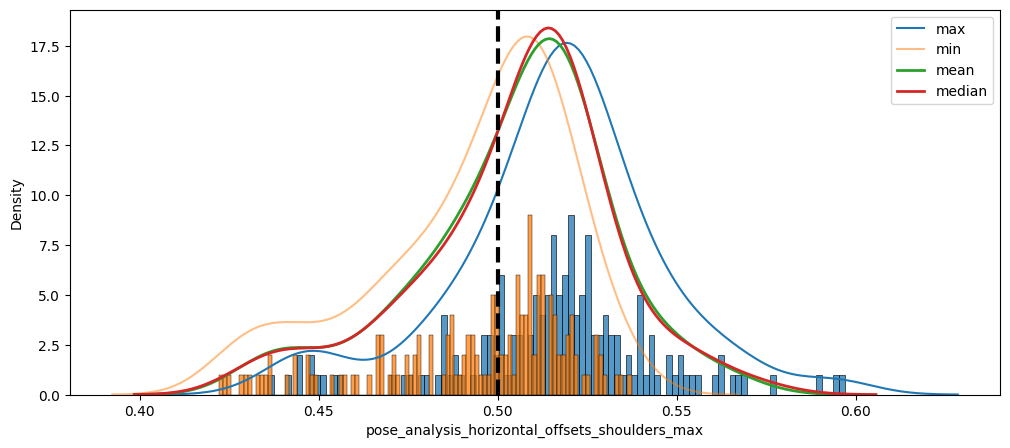

In [147]:
plt.figure(figsize=(12, 5))
sns.kdeplot(analysis_info.pose_analysis_horizontal_offsets_shoulders_max)
sns.histplot(analysis_info.pose_analysis_horizontal_offsets_shoulders_max, bins=100)

sns.kdeplot(analysis_info.pose_analysis_horizontal_offsets_shoulders_min, alpha = 0.5)
sns.histplot(analysis_info.pose_analysis_horizontal_offsets_shoulders_min, bins=100)

sns.kdeplot(analysis_info.pose_analysis_horizontal_offsets_shoulders_mean, linewidth = 2)
# sns.histplot(analysis_info.pose_analysis_horizontal_offsets_shoulders_mean, bins=100)


sns.kdeplot(analysis_info.pose_analysis_horizontal_offsets_shoulders_median, linewidth = 2)
# sns.histplot(analysis_info.pose_analysis_horizontal_offsets_shoulders_median, bins=100)
#
plt.legend(['max', 'min', 'mean', 'median'])
plt.axvline(0.5, color = 'k', linewidth = 3, linestyle = '--')

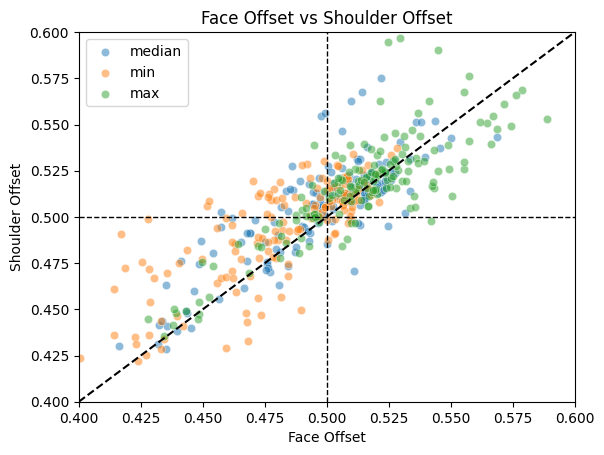

In [155]:
sns.scatterplot(x = analysis_info.pose_analysis_horizontal_offsets_face_median, y = analysis_info.pose_analysis_horizontal_offsets_shoulders_median, alpha = 0.5)
sns.scatterplot(x = analysis_info.pose_analysis_horizontal_offsets_face_min, y = analysis_info.pose_analysis_horizontal_offsets_shoulders_min, alpha = 0.5)
sns.scatterplot(x = analysis_info.pose_analysis_horizontal_offsets_face_max, y = analysis_info.pose_analysis_horizontal_offsets_shoulders_max, alpha = 0.5)
plt.xlim(0.4, 0.6)
plt.ylim(0.4, 0.6)
plt.plot([0.4, 0.6], [0.4, 0.6], 'k--')
plt.xlabel('Face Offset')
plt.ylabel('Shoulder Offset')
plt.title('Face Offset vs Shoulder Offset')
plt.legend(['median', 'min', 'max'])
plt.axvline(0.5, color = 'k', linewidth = 1, linestyle = '--')
plt.axhline(0.5, color = 'k', linewidth = 1, linestyle = '--')

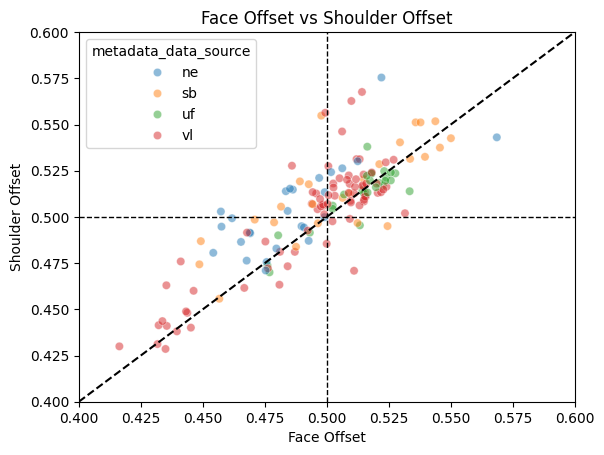

In [178]:
sns.scatterplot(x = 'pose_analysis_horizontal_offsets_face_median', y = 'pose_analysis_horizontal_offsets_shoulders_median', data = analysis_info, hue = 'metadata_data_source', alpha = 0.5)
plt.xlim(0.4, 0.6)
plt.ylim(0.4, 0.6)
plt.plot([0.4, 0.6], [0.4, 0.6], 'k--')
plt.xlabel('Face Offset')
plt.ylabel('Shoulder Offset')
plt.title('Face Offset vs Shoulder Offset')
plt.axvline(0.5, color = 'k', linewidth = 1, linestyle = '--')
plt.axhline(0.5, color = 'k', linewidth = 1, linestyle = '--')

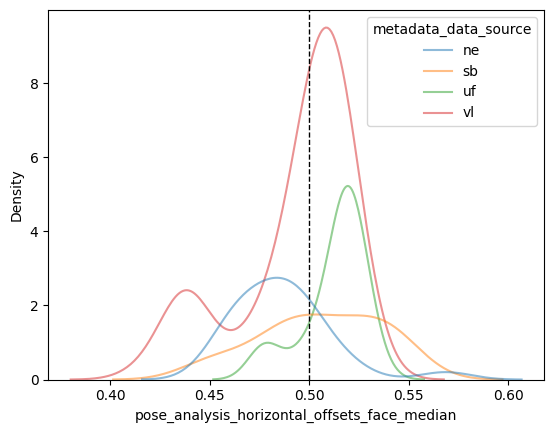

In [166]:
sns.kdeplot(data = analysis_info, x = 'pose_analysis_horizontal_offsets_face_median', hue = 'metadata_data_source', alpha = 0.5)
plt.axvline(0.5, color = 'k', linewidth = 1, linestyle = '--')

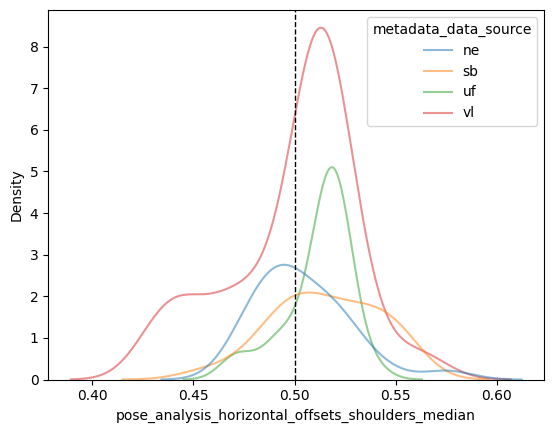

In [167]:
sns.kdeplot(data = analysis_info, x = 'pose_analysis_horizontal_offsets_shoulders_median', hue = 'metadata_data_source', alpha = 0.5)
plt.axvline(0.5, color = 'k', linewidth = 1, linestyle = '--')

In [ ]:
shoulders_median = analysis_info["pose_analysis"]["horizontal_offsets"]["shoulders"]["median"]
face_median = analysis_info["pose_analysis"]["horizontal_offsets"]["face"]["median"]

shoulders_reference = 0.5
face_reference = 0.5

shoulders_offset = shoulders_reference - shoulders_median
face_offset = face_reference - face_median

shoulders_weight = 0.7
face_weight = 0.3
horizontal_offset = shoulders_weight * shoulders_offset + face_weight * face_offset
horizontal_offset

0.0034888207912445067

#### X Scale Factor, Y Scale Factor

In [ ]:
analysis_info["pose_analysis"]["landmark_measurements"]

{'shoulder_width': {'mean': 0.19643654188049905,
  'median': 0.19426915924508475,
  'max': 0.2090008389332927},
 'hip_width': {'mean': 0.1257517734114194,
  'median': 0.12609480072645388,
  'max': 0.12865377607265074},
 'shoulder_to_hip': {'mean': 0.4793086848003729,
  'median': 0.47776501197933896,
  'max': 0.49827525282161705},
 'left_arm_length': {'mean': 0.24680996905222985,
  'median': 0.2298158988903358,
  'max': 0.3623422862255871},
 'right_arm_length': {'mean': 0.20022440832505897,
  'median': 0.18014849266203434,
  'max': 0.3336035031920863},
 'face_width': {'mean': 0.09077648767991894,
  'median': 0.08967295566002594,
  'max': 0.09869955922332911},
 'face_height': {'mean': 0.18541259318526834,
  'median': 0.1867652875494272,
  'max': 0.19387317661191944},
 'top_head_to_shoulders': {'mean': 0.2734140238807171,
  'median': 0.2845546454191208,
  'max': 0.3206898272037506},
 'nose_to_shoulders': {'mean': 0.19223914380314983,
  'median': 0.20292796194553375,
  'max': 0.25480055809

In [ ]:
# Measurements from the video
## Horizontal
shoulder_width = analysis_info["pose_analysis"]["landmark_measurements"]["shoulder_width"]["mean"]
face_width = analysis_info["pose_analysis"]["landmark_measurements"]["face_width"]["mean"]
## Vertical
face_height = analysis_info["pose_analysis"]["landmark_measurements"]["face_height"]["mean"]
chin_to_shoulders = analysis_info["pose_analysis"]["landmark_measurements"]["chin_to_shoulders"]["median"]

# Reference values to scale to
## Horizontal
reference_shoulder_width = 0.3
reference_face_width = 0.15
## Vertical
reference_face_height = 0.2
reference_chin_to_shoulders = 0.15

# Scale Factors
## Horizontal
shoulder_width_weight = 0.7
face_width_weight = 0.3
x_scale_factor = shoulder_width_weight * reference_shoulder_width / shoulder_width + face_width_weight * reference_face_width / face_width
## Vertical
face_height_weight = 0.7
chin_to_shoulders_weight = 0.3
y_scale_factor = face_height_weight * reference_face_height / face_height + chin_to_shoulders_weight * reference_chin_to_shoulders / chin_to_shoulders

x_scale_factor, y_scale_factor

(1.5647706098056886, 1.2308604879523808)

In [ ]:
# TODO: Plot the measured landmarks and the reference landmarks side by side

#### Vertical Offset

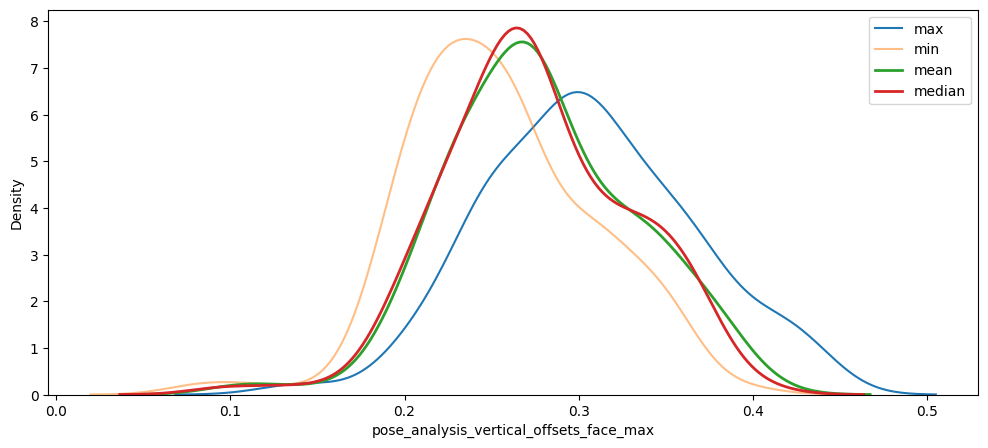

In [170]:
plt.figure(figsize=(12, 5))
sns.kdeplot(analysis_info.pose_analysis_vertical_offsets_face_max)
# sns.histplot(analysis_info.pose_analysis_vertical_offsets_face_max, bins=100)

sns.kdeplot(analysis_info.pose_analysis_vertical_offsets_face_min, alpha = 0.5)
# sns.histplot(analysis_info.pose_analysis_vertical_offsets_face_min, bins=100)

sns.kdeplot(analysis_info.pose_analysis_vertical_offsets_face_mean, linewidth = 2)
# sns.histplot(analysis_info.pose_analysis_vertical_offsets_face_mean, bins=100)


sns.kdeplot(analysis_info.pose_analysis_vertical_offsets_face_median, linewidth = 2)
# sns.histplot(analysis_info.pose_analysis_vertical_offsets_face_median, bins=100)
#
plt.legend(['max', 'min', 'mean', 'median'])
# plt.axvline(0.5, color = 'k', linewidth = 3, linestyle = '--')

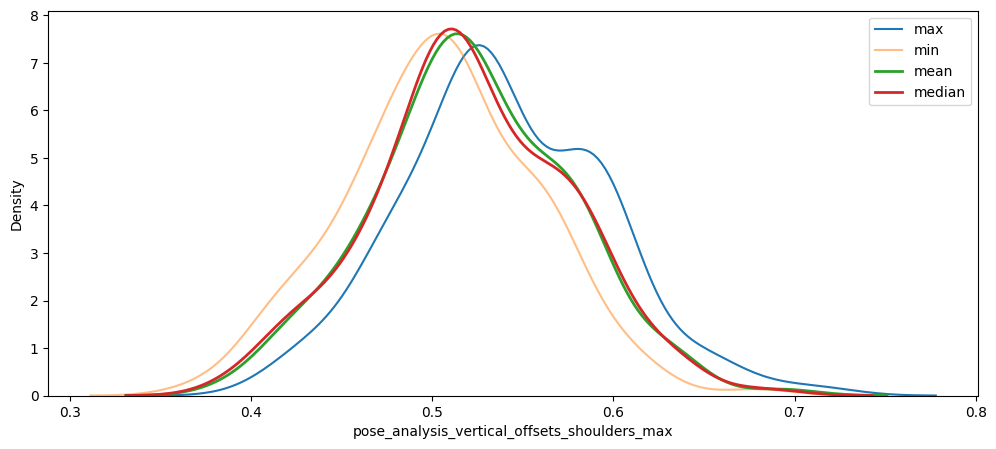

In [172]:
plt.figure(figsize=(12, 5))
sns.kdeplot(analysis_info.pose_analysis_vertical_offsets_shoulders_max)
# sns.histplot(analysis_info.pose_analysis_vertical_offsets_shoulders_max, bins=100)

sns.kdeplot(analysis_info.pose_analysis_vertical_offsets_shoulders_min, alpha = 0.5)
# sns.histplot(analysis_info.pose_analysis_vertical_offsets_shoulders_min, bins=100)

sns.kdeplot(analysis_info.pose_analysis_vertical_offsets_shoulders_mean, linewidth = 2)
# sns.histplot(analysis_info.pose_analysis_vertical_offsets_shoulders_mean, bins=100)


sns.kdeplot(analysis_info.pose_analysis_vertical_offsets_shoulders_median, linewidth = 2)
# sns.histplot(analysis_info.pose_analysis_vertical_offsets_shoulders_median, bins=100)
#
plt.legend(['max', 'min', 'mean', 'median'])

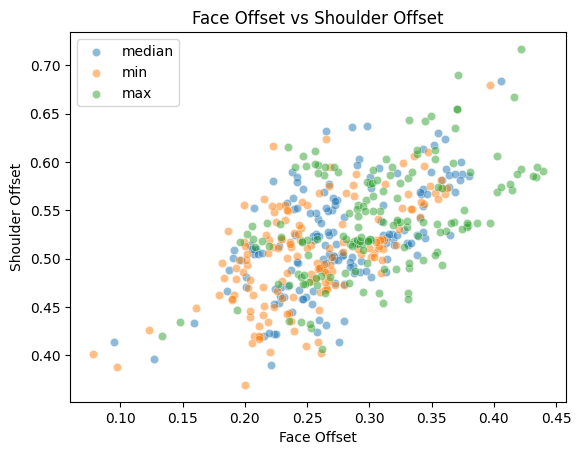

In [174]:
sns.scatterplot(x = analysis_info.pose_analysis_vertical_offsets_face_median, y = analysis_info.pose_analysis_vertical_offsets_shoulders_median, alpha = 0.5)
sns.scatterplot(x = analysis_info.pose_analysis_vertical_offsets_face_min, y = analysis_info.pose_analysis_vertical_offsets_shoulders_min, alpha = 0.5)
sns.scatterplot(x = analysis_info.pose_analysis_vertical_offsets_face_max, y = analysis_info.pose_analysis_vertical_offsets_shoulders_max, alpha = 0.5)

plt.xlabel('Face Offset')
plt.ylabel('Shoulder Offset')
plt.title('Face Offset vs Shoulder Offset')
plt.legend(['median', 'min', 'max'])

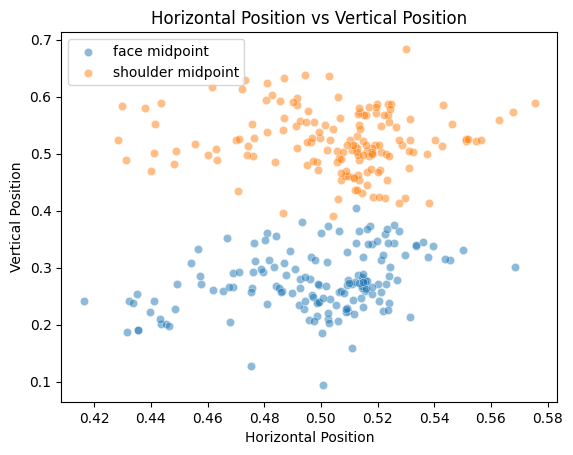

In [181]:
sns.scatterplot(x = analysis_info.pose_analysis_horizontal_offsets_face_median, y = analysis_info.pose_analysis_vertical_offsets_face_median, alpha = 0.5)
sns.scatterplot(x = analysis_info.pose_analysis_horizontal_offsets_shoulders_median, y = analysis_info.pose_analysis_vertical_offsets_shoulders_median, alpha = 0.5)

plt.xlabel('Horizontal Position')
plt.ylabel('Vertical Position')
plt.title('Horizontal Position vs Vertical Position')
plt.legend(['face midpoint', 'shoulder midpoint'])

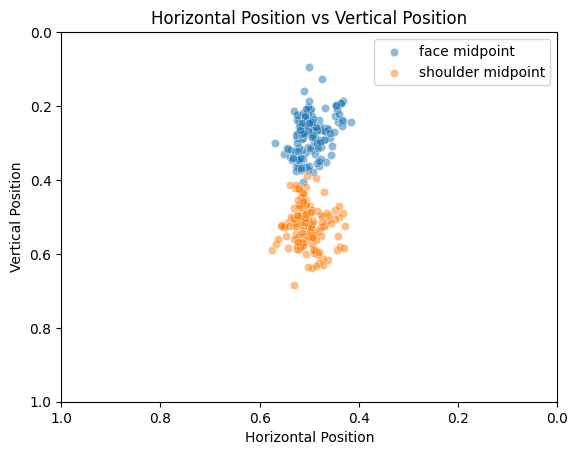

In [185]:
sns.scatterplot(x = analysis_info.pose_analysis_horizontal_offsets_face_median, y = analysis_info.pose_analysis_vertical_offsets_face_median, alpha = 0.5)
sns.scatterplot(x = analysis_info.pose_analysis_horizontal_offsets_shoulders_median, y = analysis_info.pose_analysis_vertical_offsets_shoulders_median, alpha = 0.5)
plt.xlim(1, 0)
plt.ylim(1, 0)
plt.xlabel('Horizontal Position')
plt.ylabel('Vertical Position')
plt.title('Horizontal Position vs Vertical Position')
plt.legend(['face midpoint', 'shoulder midpoint'])

Text(0.5, 1.0, 'Horizontal Position vs Vertical Position for Face and Shoulder Midpoints')

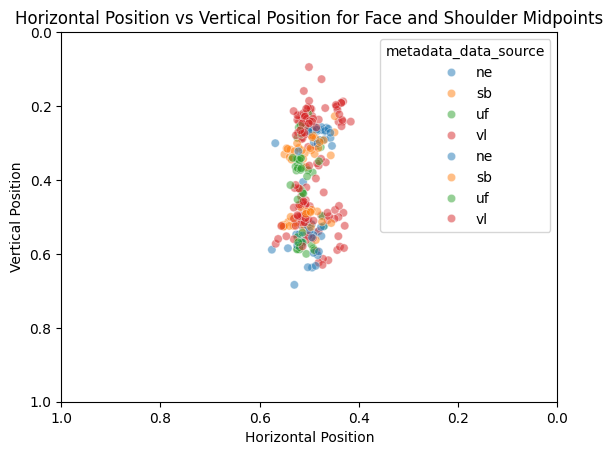

In [190]:
sns.scatterplot(data = analysis_info, x = 'pose_analysis_horizontal_offsets_face_median', y = 'pose_analysis_vertical_offsets_face_median', alpha = 0.5, hue = 'metadata_data_source')
sns.scatterplot(data = analysis_info, x = 'pose_analysis_horizontal_offsets_shoulders_median', y = 'pose_analysis_vertical_offsets_shoulders_median', alpha = 0.5, hue = 'metadata_data_source')
plt.xlim(1, 0)
plt.ylim(1, 0)
plt.xlabel('Horizontal Position')
plt.ylabel('Vertical Position')
plt.title('Horizontal Position vs Vertical Position for Face and Shoulder Midpoints')

#### Target Duration

<Axes: xlabel='motion_analysis_duration_sec', ylabel='Count'>

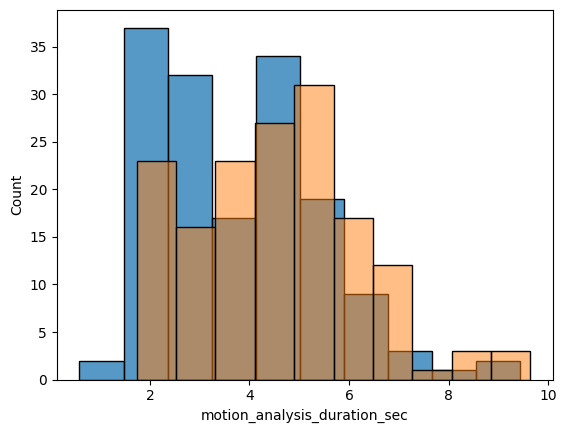

In [ ]:
sns.histplot(data=analysis_info, x = 'motion_analysis_duration_sec')
sns.histplot(data=analysis_info, x = 'metadata_duration_sec', alpha = 0.5)

<Axes: xlabel='metadata_duration_sec', ylabel='Density'>

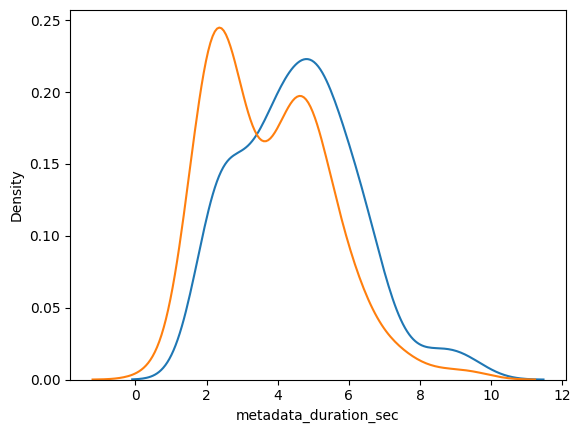

In [202]:
sns.kdeplot(data=analysis_info, x = 'metadata_duration_sec', )
sns.kdeplot(data=analysis_info, x = 'motion_analysis_duration_sec',)

<Axes: xlabel='metadata_duration_sec', ylabel='Density'>

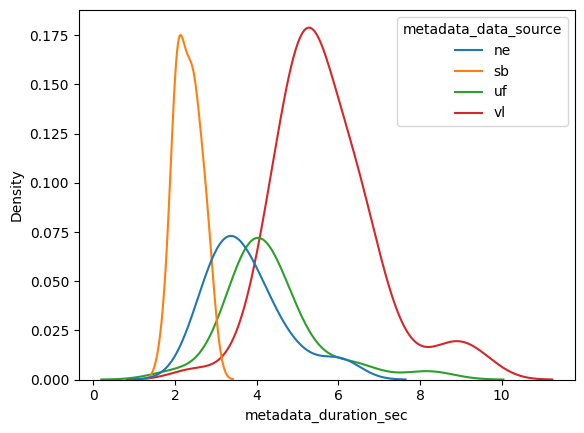

In [200]:
sns.kdeplot(data=analysis_info, x = 'metadata_duration_sec', hue = 'metadata_data_source')

<Axes: xlabel='motion_analysis_duration_sec', ylabel='Density'>

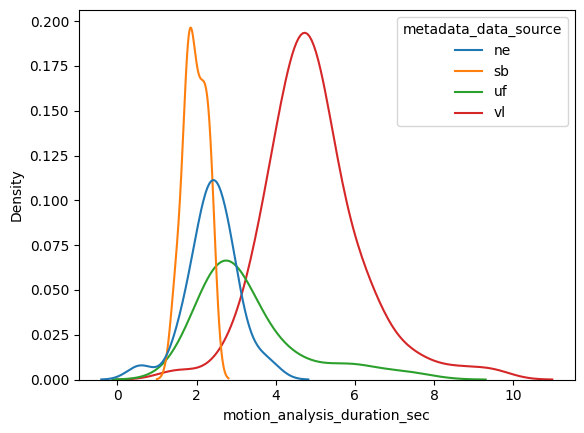

In [201]:
sns.kdeplot(data=analysis_info, x = 'motion_analysis_duration_sec', hue = 'metadata_data_source')

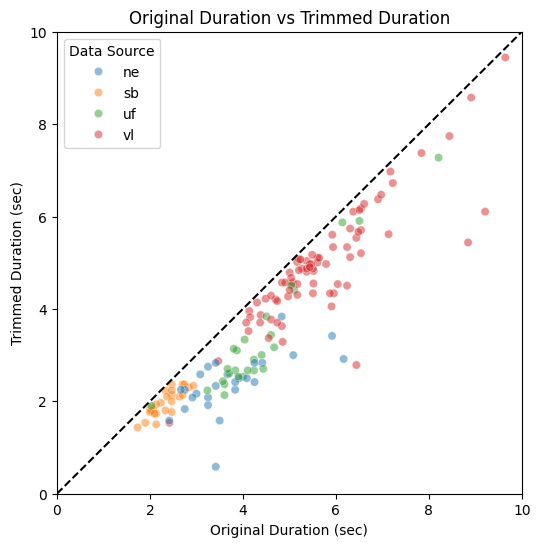

In [191]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x = 'metadata_duration_sec', y = 'motion_analysis_duration_sec', data = analysis_info, hue = 'metadata_data_source', alpha = 0.5)
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.plot([0, 10], [0, 10], 'k--')
plt.xlabel('Original Duration (sec)')
plt.ylabel('Trimmed Duration (sec)')
plt.title('Original Duration vs Trimmed Duration')
plt.legend(title='Data Source')
plt.show()


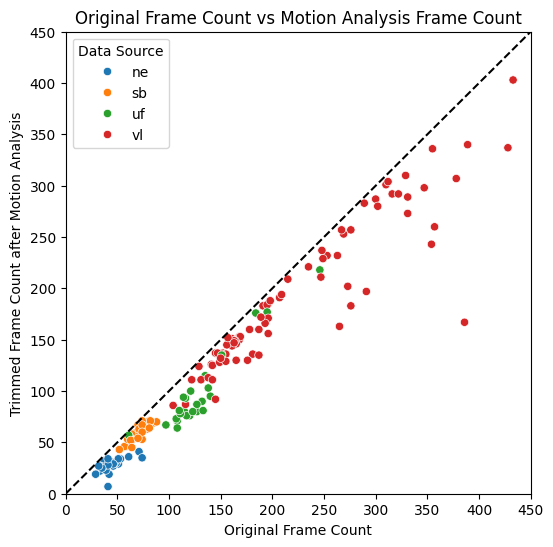

In [192]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x = 'metadata_frame_count', y = 'motion_analysis_duration_frames', data = analysis_info, hue = 'metadata_data_source')
plt.xlim(0, 450)
plt.ylim(0, 450)
plt.plot([0, 450], [0, 450], 'k--')
plt.xlabel('Original Frame Count')
plt.ylabel('Trimmed Frame Count after Motion Analysis')
plt.title('Original Frame Count vs Motion Analysis Frame Count')
plt.legend(title='Data Source')
plt.show()

## i = 1

In [14]:
with open(os.path.join(
    path_to_root, 
    "data", 
    "interim", 
    "Analysis", 
    "28032025", 
    "individual_json", 
    metadata_row["filename"].split(".")[0] + "_analysis_info.json"
    )) as f:
    analysis_info = json.load(f)

analysis_info.keys()

dict_keys(['metadata', 'params', 'motion_analysis', 'pose_analysis'])

In [16]:
video_path = os.path.join(
    path_to_root,
    "data",
    "raw",
    "combined",
    "videos",
    metadata_row["filename"]
)
frame = get_frame(20, video_path)

In [17]:
landmark_stages = {
    0: {
        "suffix": "",
        "description": "Raw Landmarks"
    },
    1: {
        "suffix": "_1_trimmed",
        "description": "Trimmed Landmarks"
    },
    2: {
        "suffix": "_2_h_aligned",
        "description": "Horizontal Aligned Landmarks"
    },
    3: {
        "suffix": "_3_scaled",
        "description": "Scaled Landmarks"
    },
    4: {
        "suffix": "_4_v_aligned",
        "description": "Vertical Aligned Landmarks"
    },
    5: {
        "suffix": "_5_padded",
        "description": "Padded Landmarks"
    },
    6: {
        "suffix": "_6_cropped",
        "description": "Cropped Landmarks"
    },
}

In [18]:
for stage in landmark_stages:
    landmarks_path = os.path.join(
        path_to_root,
        "data",
        "interim",
        "RawPoseLandmarks",
        'versionA', metadata_row["filename"].split(".")[0] + landmark_stages[stage]["suffix"] + ".npy")
    if os.path.exists(landmarks_path):
        landmarks = np.load(landmarks_path, allow_pickle=True)
        print(f"Landmarks loaded from {landmarks_path}")
        landmark_stages[stage]["landmarks"] = landmarks
    else:
        print(f"Landmarks not found at {landmarks_path}")
    

2025-03-31 21:25:08.732927: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743423908.778983   48042 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743423908.796891   48042 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-31 21:25:08.915373: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Landmarks loaded from /home/ben/projects/SaoPauloBrazilChapter_BrazilianSignLanguage/data/interim/RawPoseLandmarks/versionA/ajudar_sb_2.npy
Landmarks loaded from /home/ben/projects/SaoPauloBrazilChapter_BrazilianSignLanguage/data/interim/RawPoseLandmarks/versionA/ajudar_sb_2_1_trimmed.npy
Landmarks loaded from /home/ben/projects/SaoPauloBrazilChapter_BrazilianSignLanguage/data/interim/RawPoseLandmarks/versionA/ajudar_sb_2_2_h_aligned.npy
Landmarks loaded from /home/ben/projects/SaoPauloBrazilChapter_BrazilianSignLanguage/data/interim/RawPoseLandmarks/versionA/ajudar_sb_2_3_scaled.npy
Landmarks loaded from /home/ben/projects/SaoPauloBrazilChapter_BrazilianSignLanguage/data/interim/RawPoseLandmarks/versionA/ajudar_sb_2_4_v_aligned.npy
Landmarks loaded from /home/ben/projects/SaoPauloBrazilChapter_BrazilianSignLanguage/data/interim/RawPoseLandmarks/versionA/ajudar_sb_2_5_padded.npy
Landmarks loaded from /home/ben/projects/SaoPauloBrazilChapter_BrazilianSignLanguage/data/interim/RawPoseLan

### EDA